# Stemper et al., (2004): Extension

- Performed by: Yash Niranjan Poojary
- Reviewed by:
- Last modified : 2nd January 2024
- SAFER HBM Version: ![Static Badge](https://img.shields.io/badge/SAFER_HBM-11.0-1?style=flat&logoColor=blue&labelColor=whitw&color=blue)
- LSDYNA version:  `mpp d R12.2.1 `

## Experiment by Stemper et al., (2004)
### Summary:

The simulated outputs are compared to the references from PMHS tests reported by Bouquet et al.  <sup>[1]</sup>
1.	Stemper BD, Yoganandan N, Pintar FA, Response corridors of the human head-neck complex in rear impact. Annual Proceedings/Association for the Advancement of Automotive Medicine; 2004: Association for the Advancement of Automotive Medicine. [Article](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3217421/pdf/aam48_149.pdf)

<!-- ![](../_env/setup_stemper_HN_V11.png)  -->

```{figure} ../_env/setup_stemper_HN_V11.png
---
align: center
---
Table top diagonal belt setup

### Information on the subjects/specimens
- `Coordinate system `    : aligned with Global in simulations
- `Load case`    : Rear impact- extension of the cervical spine
- Two validation simulations were run, with an acceleration pulse applied to T1 corresponding to a 2.6 m/s and 1.8 m/s impact velocity.
- Tests conducted on 10 PMHS (5M:5F).

| **Sex** | **Age [years]** | **Height [cm]** | **Body weight [kg]** |
| :-----: | :-------------: | :-------------: | :------------------: |
|  Male   | 61.8 $\pm$ 13.1 | 173.5 $\pm$ 2.8 |   75.0 $\pm$ 15.9    |
| Female  | 55.2 $\pm$ 17.2 | 167.2 $\pm$ 2.2 |   54.6 $\pm$ 14.1    |

### Loading and Boundary Conditions
- `*BOUNDARY_PRESCRIBED_MOTION_RIGID` define accerealtion pulse to the potting base
- gravity defined during the entire simulation.
- Termination time set to 300 ms.

### Specimen position:
- Head-neck isolated at T1 and T1 fixed Potted in a PMMA cup.
- Anterior of the T1 vertebra body oriented 25 degree with respect to the verteical.
- The occipital condyles aligned superiorly of T1.
- The franfurt plane of the head maintained horizontal.
- Skin and the musculature left intact and attached to the PMMA base.

#### Pre-Simulation for Initial position:
- The head neck submodel was broght into position to match the  PMHS setup using cables and gravity setteling for $150 ms$.
- `GLOBAL_DAMPING` defined during the presimulation to remove kinetic energy due to positioning.
 
|               | **Head angle [degrees]** | **T1 anterior angle [degrees]** | **OC-T1 X distance [mm]** |
| :-----------: | :----------------------: | :-----------------------------: | :-----------------------: |
|   **Test**    |            0             |               25                |             0             |
| **SHBM 11.0** |           3.8            |               25                |            0.2            |

### Responses recorded
- The rotational responses of spine segments were compared with the PMHS response corridors.
- Head-T1 kinematics compared.
- The response corridors from the litrature are scaled to the 50th percentile male using dimensional scaling

The reference values from the paper were digitalised using WebPlotDigitizer [2] and are incuded in the notebook. 

2.	Drevon D, Fursa SR, Malcolm AL. Intercoder reliability and validity of WebPlotDigitizer in extracting graphed data. Behavior modification. 2017;41(2):323-39.

### Other References
3.	Stemper BD, Yoganandan N, Pintar FA. Gender dependent cervical spine segmental kinematics during whiplash. Journal of Biomechanics. 2003;36(9):1281-9.
4.	Östh J, Mendoza-Vazquez M, Sato F, Svensson MY, Linder A, Brolin K. A female head–neck model for rear impact simulations. Journal of biomechanics. 2017;51:49-56.



In [1]:
import os
import glob
# for data analysis
import pandas as pd
import numpy as np
from numpy.linalg import norm
# packages for plotting
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Plot formats
sns.set()
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1)
s11 = {"linestyle" :'-', "color" : 'b',"alpha" :1,"linewidth":2}
pmhsM = {"linestyle" :'--', "color" : 'b',"alpha" :0.7,"linewidth":1}
pmhsF = {"linestyle" :'--', "color" : 'r',"alpha" : 0.7,"linewidth":1}
test_corr_shade = {"color": 'silver',"alpha" : 0.7,'linewidth':0.0}
test_corr_2 = {"color": 'g',"alpha" : 0.4,'linewidth':0.0}
test_corr = {"marker" :'o',"linestyle":'--',"color": 'grey',"alpha" : 1}
Test_avg = {"linestyle" :'-', "color" : 'k',"alpha" :1,"linewidth":1, 'marker' :"o", 'markevery': 5}
# Dataframe formats
def select_col(x):
    mask = x['Overall Score'] <0.5
    df1 =  pd.DataFrame('', index=x.index, columns=x.columns)
    df1.loc[mask,'Overall Score'] = 'color:crimson;font-weight:bold;'
    return df1
heading = [dict(selector="caption",
            props=[("text-align", "center"),
                   ("font-size", "150%"),
                   ("font-weight", "bold")])]
content={'text-align': 'center'}

In [3]:
binout_path_sim={}
result_output_dir={}

Tests=["1.8","2.6"]

figures_dir = "../data/processed/SAFER_11.0/figures/"
processed_data_dir = f"../data/processed/SAFER_11.0"
experiment_dir= "../data/experiment_data/"

if not os.path.exists(figures_dir): 
    os.makedirs(figures_dir)
if not os.path.exists(processed_data_dir): 
    os.makedirs(processed_data_dir)

for test in Tests:
    binout_path_sim[test] = test
    result_output_dir[test] = os.path.join(processed_data_dir, binout_path_sim[test])
    if not os.path.exists(result_output_dir[test]): 
        os.makedirs(result_output_dir[test])


## Postprocessing with dynasaur

In [4]:
# Import the dynasaur library
from dynasaur.plugins.data_visualization_controller import DataVisualizationController

In [5]:
# Path to Dynasaur definition files

# Dynasaur object definitions
dynasaur_ids = ["../_env/id.def","../../model/SAFER_11.0/postprocessing/00_SAFER_ID_V11.def"]

# Dynasaur calculation definitions
dynasaur_calculation_defs = [ "../_env/post.def","../../model/SAFER_11.0/postprocessing/01_energy_calculation.def"]

In [6]:
sim_output={}
for test in Tests:
    sim = DataVisualizationController(calculation_procedure_def_file=dynasaur_calculation_defs,
                                                  object_def_file=dynasaur_ids,
                                                  data_source= binout_path_sim[test] +'/binout*')
    commands = sim.get_defined_calculation_procedures()
    print(commands)
    for command in sim.get_defined_calculation_procedures():
        sim.calculate(command)
    sim.write_CSV(result_output_dir[test], filename="Dynasaur_output.csv")

    sim_output[test]=pd.read_csv(os.path.join(result_output_dir[test],"Dynasaur_output.csv"), delimiter=';', na_values='-', header = [0,1,2,3])

[READ DYNASAUR DEF]	read ../_env/post.def
[READ DYNASAUR DEF]	read ../../model/SAFER_11.0/postprocessing/01_energy_calculation.def
[READ DYNASAUR DEF]	done
[READ DYNASAUR DEF]	read ../_env/id.def
[READ DYNASAUR DEF]	read ../../model/SAFER_11.0/postprocessing/00_SAFER_ID_V11.def
[READ DYNASAUR DEF]	done
[READ BINOUT]	read nodout data ...
[READ BINOUT]	done reading nodout!
[READ BINOUT]	read glstat data ...
[READ BINOUT]	done reading glstat!
[{'visualization': 'Bone_T1', 'x_label': 'time', 'y_label': 'displacement'}, {'visualization': 'Bone_Head', 'x_label': 'time', 'y_label': 'displacement'}, {'visualization': 'Bone_T1_ry', 'x_label': 'time', 'y_label': 'angle'}, {'visualization': 'Bone_Head_ry', 'x_label': 'time', 'y_label': 'angle'}, {'visualization': 'Bone_C2', 'x_label': 'time', 'y_label': 'angle'}, {'visualization': 'Bone_C3', 'x_label': 'time', 'y_label': 'angle'}, {'visualization': 'Bone_C4', 'x_label': 'time', 'y_label': 'angle'}, {'visualization': 'Bone_C5', 'x_label': 'time', 

c:\Users\yash\Anaconda3\envs\SOT\lib\site-packages\dynasaur\calc\cfc.py:66: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  sampled_array = np.array(sampled_array)


[CALCULATION]	Calculating Visualization: Bone_C3CFC
[DATA]	read id 4900130 from channel name: ry_displacement
[CALCULATION]	Calculating Visualization: Bone_C4CFC
[DATA]	read id 4900140 from channel name: ry_displacement
[CALCULATION]	Calculating Visualization: Bone_C5CFC
[DATA]	read id 4900150 from channel name: ry_displacement
[CALCULATION]	Calculating Visualization: Bone_C6CFC
[DATA]	read id 4900160 from channel name: ry_displacement
[CALCULATION]	Calculating Visualization: Bone_C7CFC
[DATA]	read id 4900170 from channel name: ry_displacement
[CALCULATION]	Calculating Visualization: MODEL_Added_Mass
[DATA]	ENERGY_GLOBAL read from channel name: added_mass
[CALCULATION]	Calculating Visualization: MODEL_Total_Energy
[DATA]	ENERGY_GLOBAL read from channel name: total_energy
[CALCULATION]	Calculating Visualization: MODEL_Internal_Energy
[DATA]	ENERGY_GLOBAL read from channel name: internal_energy
[CALCULATION]	Calculating Visualization: MODEL_Kinetic_Energy
[DATA]	ENERGY_GLOBAL read from c

c:\Users\yash\Anaconda3\envs\SOT\lib\site-packages\dynasaur\calc\cfc.py:66: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  sampled_array = np.array(sampled_array)


[CALCULATION]	Calculating Visualization: Bone_C3CFC
[DATA]	read id 4900130 from channel name: ry_displacement
[CALCULATION]	Calculating Visualization: Bone_C4CFC
[DATA]	read id 4900140 from channel name: ry_displacement
[CALCULATION]	Calculating Visualization: Bone_C5CFC
[DATA]	read id 4900150 from channel name: ry_displacement
[CALCULATION]	Calculating Visualization: Bone_C6CFC
[DATA]	read id 4900160 from channel name: ry_displacement
[CALCULATION]	Calculating Visualization: Bone_C7CFC
[DATA]	read id 4900170 from channel name: ry_displacement
[CALCULATION]	Calculating Visualization: MODEL_Added_Mass
[DATA]	ENERGY_GLOBAL read from channel name: added_mass
[CALCULATION]	Calculating Visualization: MODEL_Total_Energy
[DATA]	ENERGY_GLOBAL read from channel name: total_energy
[CALCULATION]	Calculating Visualization: MODEL_Internal_Energy
[DATA]	ENERGY_GLOBAL read from channel name: internal_energy
[CALCULATION]	Calculating Visualization: MODEL_Kinetic_Energy
[DATA]	ENERGY_GLOBAL read from c

In [7]:
# Experiment data
exp_H=pd.read_csv(os.path.join(experiment_dir,'2.6ms.csv'), delimiter=';',na_values='-',header=[0,1,2,3])
exp_L=pd.read_csv(os.path.join(experiment_dir,'1.8ms.csv'), delimiter=';',na_values='-',header=[0,1,2,3])
PMHS=['C23','C34','C45','C56','C67']

## Resample data
def resam(xdata,ydata,sTime,endtime):
    x = xdata
    y = ydata
    # Interpolate the data to the desired length
    newx = np.arange(sTime,endtime,0.1)#10kHz resolution
    newy = np.interp(newx, x, y)
    return np.array(newy).flatten()

test_average={}
segments=['C23','C34','C45','C56','C67']
for segment in segments:
    T_samp=np.arange(0,120,0.1)
    df=pd.DataFrame(T_samp)
    exp_t=exp_H.Humm[segment].avg.X.dropna()
    exp_v=exp_H.Humm[segment].avg.Y.dropna()
    r_v=resam(exp_t,exp_v,0,120)
    test_average[segment,'2.6']=r_v

Sim_ISO={}

## Spine kinematics
### Low speed :1.8 m/s

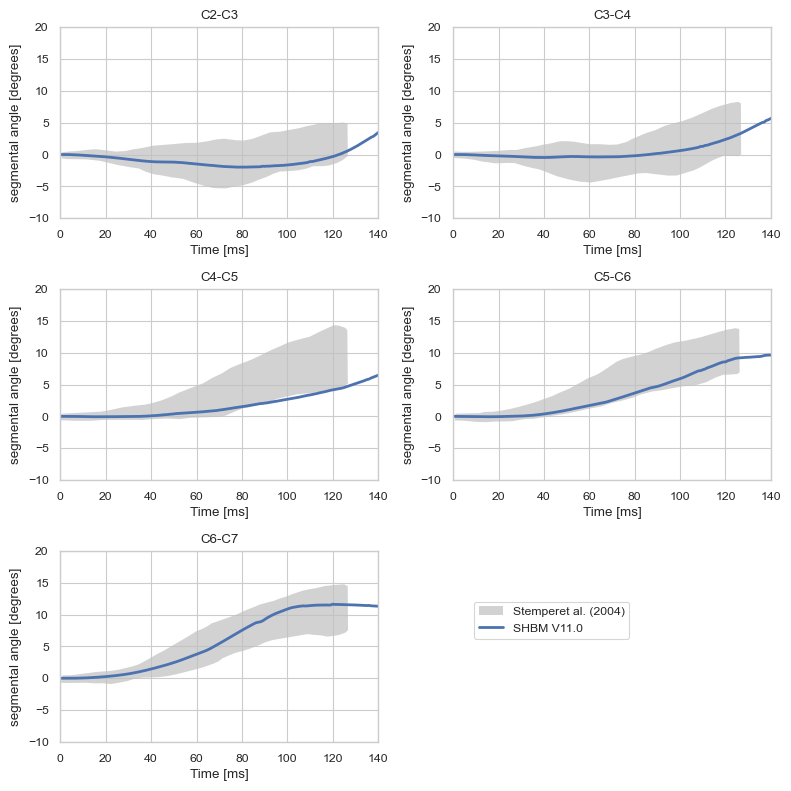

In [8]:
fig_fd, ax = plt.subplots(nrows=3, ncols=2,figsize=(8,8))

ax[0,0].set(title='C2-C3',ylabel='segmental angle [degrees]',xlabel='Time [ms]',ylim=[-10,20],xlim=[0,140]);
ax[0,0].fill_between(exp_L.Stemper['C23']['corr'].X,exp_L.Stemper['C23']['corr'].Y,**test_corr_shade,label='Stemperet al. (2004)')
ax[0,0].plot(sim_output["1.8"].Bone.C2.time,-np.degrees(sim_output["1.8"].Bone.C2.angle-sim_output["1.8"].Bone.C3.angle),**s11,label='SHBM V11.0')

ax[0,1].set(title='C3-C4',ylabel='segmental angle [degrees]',xlabel='Time [ms]',ylim=[-10,20],xlim=[0,140]);
ax[0,1].fill_between(exp_L.Stemper['C34']['corr'].X,exp_L.Stemper['C34']['corr'].Y,**test_corr_shade)
ax[0,1].plot(sim_output["1.8"].Bone.C2.time,-np.degrees(sim_output["1.8"].Bone.C3.angle-sim_output["1.8"].Bone.C4.angle),**s11)

ax[1,0].set(title='C4-C5',ylabel='segmental angle [degrees]',xlabel='Time [ms]',ylim=[-10,20],xlim=[0,140]);
ax[1,0].fill_between(exp_L.Stemper['C45']['corr'].X,exp_L.Stemper['C45']['corr'].Y,**test_corr_shade)
ax[1,0].plot(sim_output["1.8"].Bone.C2.time,-np.degrees(sim_output["1.8"].Bone.C4.angle-sim_output["1.8"].Bone.C5.angle),**s11)

ax[1,1].set(title='C5-C6',ylabel='segmental angle [degrees]',xlabel='Time [ms]',ylim=[-10,20],xlim=[0,140]);
ax[1,1].fill_between(exp_L.Stemper['C56']['corr'].X,exp_L.Stemper['C56']['corr'].Y,**test_corr_shade)
ax[1,1].plot(sim_output["1.8"].Bone.C2.time,-np.degrees(sim_output["1.8"].Bone.C5.angle-sim_output["1.8"].Bone.C6.angle),**s11)

ax[2,0].set(title='C6-C7',ylabel='segmental angle [degrees]',xlabel='Time [ms]',ylim=[-10,20],xlim=[0,140]);
ax[2,0].fill_between(exp_L.Stemper['C67']['corr'].X,exp_L.Stemper['C67']['corr'].Y,**test_corr_shade)
ax[2,0].plot(sim_output["1.8"].Bone.C2.time,-np.degrees(sim_output["1.8"].Bone.C6.angle-sim_output["1.8"].Bone.C7.angle),**s11)


fig_fd.delaxes(ax[2,1])
fig_fd.legend( bbox_to_anchor=(0.8,0.25))
fig_fd.tight_layout()

### High speed :2.6 m/s

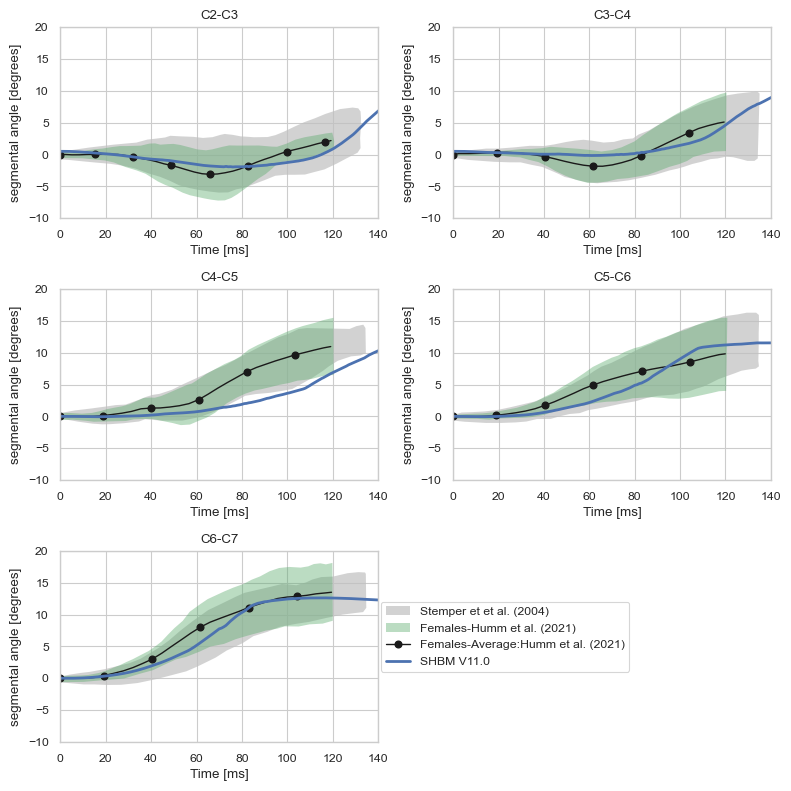

In [9]:

fig_fd, ax = plt.subplots(nrows=3, ncols=2,figsize=(8,8))
ax[0,0].set(title='C2-C3',ylabel='segmental angle [degrees]',xlabel='Time [ms]',ylim=[-10,20],xlim=[0,140]);
ax[0,0].fill_between(exp_H.Stemper['C23']['corr'].X,exp_H.Stemper['C23']['corr'].Y,**test_corr_shade,label='Stemper et et al. (2004)')
ax[0,0].fill_between(exp_H.Humm['C23']['corr'].X,exp_H.Humm['C23']['corr'].Y,**test_corr_2,label='Females-Humm et al. (2021)')
ax[0,0].plot(exp_H.Humm['C23']['avg'].X,exp_H.Humm['C23']['avg'].Y,**Test_avg,label='Females-Average:Humm et al. (2021)')
ax[0,0].plot(sim_output["2.6"].Bone.C2.time,-np.degrees(sim_output["2.6"].Bone.C2.angle-sim_output["2.6"].Bone.C3.angle)+0.5,**s11,label='SHBM V11.0')

ax[0,1].set(title='C3-C4',ylabel='segmental angle [degrees]',xlabel='Time [ms]',ylim=[-10,20],xlim=[0,140]);
ax[0,1].fill_between(exp_H.Stemper['C34']['corr'].X,exp_H.Stemper['C34']['corr'].Y,**test_corr_shade)
ax[0,1].fill_between(exp_H.Humm['C34']['corr'].X,exp_H.Humm['C34']['corr'].Y,**test_corr_2)
ax[0,1].plot(exp_H.Humm['C34']['avg'].X,exp_H.Humm['C34']['avg'].Y,**Test_avg)
ax[0,1].plot(sim_output["2.6"].Bone.C2.time,-np.degrees(sim_output["2.6"].Bone.C3.angle-sim_output["2.6"].Bone.C4.angle)+0.5,**s11)

ax[1,0].set(title='C4-C5',ylabel='segmental angle [degrees]',xlabel='Time [ms]',ylim=[-10,20],xlim=[0,140]);
ax[1,0].fill_between(exp_H.Stemper['C45']['corr'].X,exp_H.Stemper['C45']['corr'].Y,**test_corr_shade)
ax[1,0].fill_between(exp_H.Humm['C45']['corr'].X,exp_H.Humm['C45']['corr'].Y,**test_corr_2)
ax[1,0].plot(exp_H.Humm['C45']['avg'].X,exp_H.Humm['C45']['avg'].Y,**Test_avg)
ax[1,0].plot(sim_output["2.6"].Bone.C2.time,-np.degrees(sim_output["2.6"].Bone.C4.angle-sim_output["2.6"].Bone.C5.angle),**s11)

ax[1,1].set(title='C5-C6',ylabel='segmental angle [degrees]',xlabel='Time [ms]',ylim=[-10,20],xlim=[0,140]);
ax[1,1].fill_between(exp_H.Stemper['C56']['corr'].X,exp_H.Stemper['C56']['corr'].Y,**test_corr_shade)
ax[1,1].fill_between(exp_H.Humm['C56']['corr'].X,exp_H.Humm['C56']['corr'].Y,**test_corr_2)
ax[1,1].plot(exp_H.Humm['C56']['avg'].X,exp_H.Humm['C56']['avg'].Y,**Test_avg)
ax[1,1].plot(sim_output["2.6"].Bone.C2.time,-np.degrees(sim_output["2.6"].Bone.C5.angle-sim_output["2.6"].Bone.C6.angle),**s11)

ax[2,0].set(title='C6-C7',ylabel='segmental angle [degrees]',xlabel='Time [ms]',ylim=[-10,20],xlim=[0,140]);
ax[2,0].fill_between(exp_H.Stemper['C67']['corr'].X,exp_H.Stemper['C67']['corr'].Y,**test_corr_shade)
ax[2,0].fill_between(exp_H.Humm['C67']['corr'].X,exp_H.Humm['C67']['corr'].Y,**test_corr_2)
ax[2,0].plot(exp_H.Humm['C67']['avg'].X,exp_H.Humm['C67']['avg'].Y,**Test_avg)
ax[2,0].plot(sim_output["2.6"].Bone.C2.time,-np.degrees(sim_output["2.6"].Bone.C6.angle-sim_output["2.6"].Bone.C7.angle),**s11)


fig_fd.delaxes(ax[2,1])
fig_fd.legend( bbox_to_anchor=(0.8,0.25))
fig_fd.tight_layout()

Sim_ISO['Time']=sim_output["2.6"].Bone.C2.time
Sim_ISO['C23','2.6']=-np.degrees(sim_output["2.6"].Bone.C2.angle-sim_output["2.6"].Bone.C3.angle)+0.5
Sim_ISO['C34','2.6']=-np.degrees(sim_output["2.6"].Bone.C3.angle-sim_output["2.6"].Bone.C4.angle)+0.5
Sim_ISO['C45','2.6']=-np.degrees(sim_output["2.6"].Bone.C4.angle-sim_output["2.6"].Bone.C5.angle)
Sim_ISO['C56','2.6']=-np.degrees(sim_output["2.6"].Bone.C5.angle-sim_output["2.6"].Bone.C6.angle)
Sim_ISO['C67','2.6']=-np.degrees(sim_output["2.6"].Bone.C6.angle-sim_output["2.6"].Bone.C7.angle)

## Head -T1 kinematics

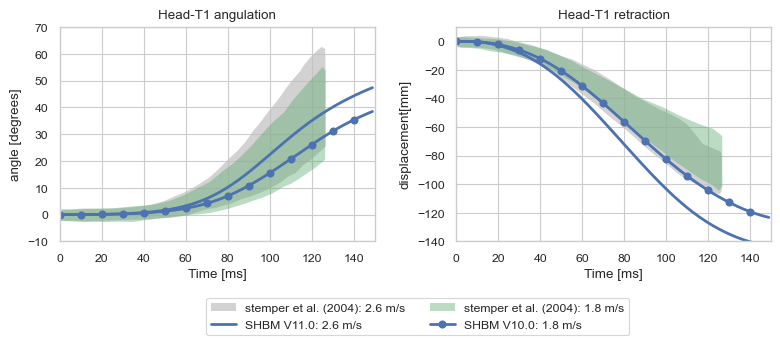

In [10]:
fig_fd, ax = plt.subplots(nrows=1, ncols=2,figsize=(8,3))

ax[0].set(title='Head-T1 angulation',ylabel='angle [degrees]',xlabel='Time [ms]',ylim=[-10,70],xlim=[0,150]);
ax[0].fill_between(exp_H.Stemper['HT1']['angle'].X,exp_H.Stemper['HT1']['angle'].Y,**test_corr_shade,label='stemper et al. (2004): 2.6 m/s')
ax[0].plot(sim_output["2.6"].Bone.C2.time,-np.degrees(sim_output["2.6"].Bone.Head_ry.angle-sim_output["2.6"].Bone.T1_ry.angle),**s11,label='SHBM V11.0: 2.6 m/s')

ax[1].set(title='Head-T1 retraction',ylabel='displacement[mm]',xlabel='Time [ms]',ylim=[-140,10],xlim=[0,150]);
ax[1].fill_between(exp_H.Stemper['HT1']['Retraction'].X,exp_H.Stemper['HT1']['Retraction'].Y,**test_corr_shade)
ax[1].plot(sim_output["2.6"].Bone.C2.time,(sim_output["2.6"].Bone.Head.displacement-sim_output["2.6"].Bone.T1.displacement),**s11)

ax[0].set(title='Head-T1 angulation',ylabel='angle [degrees]',xlabel='Time [ms]',ylim=[-10,70],xlim=[0,150]);
ax[0].fill_between(exp_L.Stemper['HT1']['angle'].X,exp_L.Stemper['HT1']['angle'].Y,**test_corr_2,label='stemper et al. (2004): 1.8 m/s')
ax[0].plot(sim_output["1.8"].Bone.C2.time,-np.degrees(sim_output["1.8"].Bone.Head_ry.angle-sim_output["1.8"].Bone.T1_ry.angle),**s11,marker='o',markevery=10,label='SHBM V10.0: 1.8 m/s')

ax[1].set(title='Head-T1 retraction',ylabel='displacement[mm]',xlabel='Time [ms]',ylim=[-140,10],xlim=[0,150]);
ax[1].fill_between(exp_L.Stemper['HT1']['Retraction'].X,exp_L.Stemper['HT1']['Retraction'].Y,**test_corr_2)
ax[1].plot(sim_output["1.8"].Bone.C2.time,(sim_output["1.8"].Bone.Head.displacement-sim_output["1.8"].Bone.T1.displacement),**s11,marker='o',markevery=10)


fig_fd.legend( bbox_to_anchor=(0.8,0.01),ncols=2)
fig_fd.tight_layout()

## Energy plots

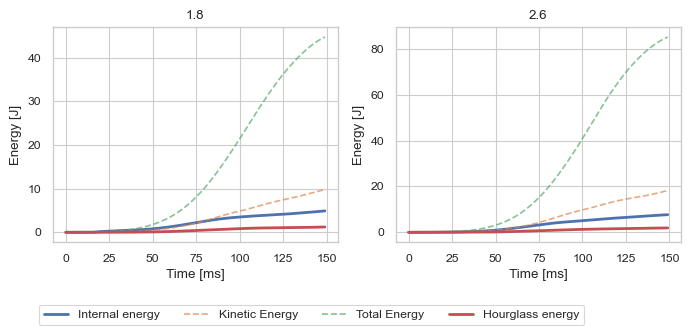

In [11]:
fig_eny, axs = plt.subplots(nrows=1, ncols=2,figsize=(7,3))
i=0
for ax in axs.flat:
    ax.plot(sim_output[Tests[i]].MODEL.Internal_Energy.time,sim_output[Tests[i]].MODEL.Internal_Energy.energy,linewidth=2)
    ax.plot(sim_output[Tests[i]].MODEL.Kinetic_Energy.time,sim_output[Tests[i]].MODEL.Kinetic_Energy.energy,linestyle='--',alpha=0.7)
    ax.plot(sim_output[Tests[i]].MODEL.Total_Energy.time,sim_output[Tests[i]].MODEL.Total_Energy.energy,linestyle='--',alpha=0.7)
    ax.plot(sim_output[Tests[i]].MODEL.Hourglass_Energy.time,sim_output[Tests[i]].MODEL.Hourglass_Energy.energy,linewidth=2)
    ax.set(title="{}".format(Tests[i]),xlabel='Time [ms]',ylabel='Energy [J]')
    i=i+1

fig_eny.legend(["Internal energy","Kinetic Energy","Total Energy","Hourglass energy"], bbox_to_anchor=(0.85,-0.01),ncol=4);
fig_eny.tight_layout()

In [12]:
# Import objective rating metric library
from objective_rating_metrics.rating import ISO18571

In [13]:
measures=pd.DataFrame(Sim_ISO.keys())
df_res = pd.DataFrame(columns=['Segment','Speed','Corridor Score', 'Phase Score', 'Magnitude Score', 'Slope Score', 'Overall Score'])
for m in range(1,len(measures)):
    T_samp=np.arange(0,120,0.1)
    sim_t=np.array(Sim_ISO['Time']).flatten()
    sim_v=np.array(Sim_ISO[measures[0][m]]).flatten()
    ref = np.vstack((T_samp, test_average[measures[0][m]])).T
    s_v=resam(sim_t,sim_v,0,120)
    sim = np.vstack((T_samp, s_v)).T
    iso_rating = ISO18571(reference_curve=ref, comparison_curve=sim)
    df_rate = pd.DataFrame(columns=['Segment','Speed','Corridor Score', 'Phase Score', 'Magnitude Score', 'Slope Score', 'Overall Score'])
    df_rate['Segment']=['{}'.format(measures[0][m][0])]
    df_rate['Speed']=['{}'.format(measures[0][m][1])]
    df_rate['Corridor Score']=[iso_rating.corridor_rating()]
    df_rate['Phase Score']=[iso_rating.phase_rating()]
    df_rate['Magnitude Score']=[iso_rating.magnitude_rating()]
    df_rate['Slope Score']=[iso_rating.slope_rating()]
    df_rate['Overall Score']=[iso_rating.overall_rating()]
    df_res=pd.concat([df_res,df_rate], ignore_index=True)
df_res.to_csv(os.path.join(result_output_dir["2.6"],"ISO.csv"))

Average: 0.6 
Range: 0.5-0.84


,Segment,Speed,Corridor Score,Phase Score,Magnitude Score,Slope Score,Overall Score
0,C23,2.6,0.44,0.47,0.70,0.64,0.54
1,C34,2.6,0.60,0.82,0.15,0.62,0.56
2,C45,2.6,0.49,0.00,0.79,0.71,0.50
3,C56,2.6,0.69,0.00,0.64,0.72,0.55
4,C67,2.6,0.89,0.60,0.99,0.81,0.84


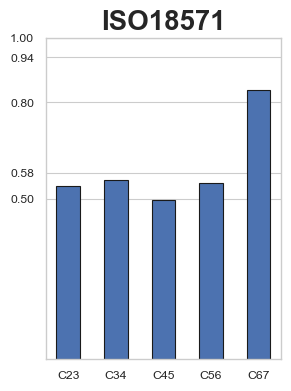

In [14]:
B1={'width' : 0.5 , 'color':'b','alpha':1, 'edgecolor':'k'}

fig, ax = plt.subplots(figsize=(3, 4))
br1 = np.arange(len(df_res))
ax.bar(br1,df_res['Overall Score'].values,**B1)

plt.xticks(range(len(df_res)), df_res['Segment'], rotation=0)
ax.set_ylim([0,1])
ax.set_yticks([0.5,0.58,0.80,0.94,1])
ax.grid(axis='x')
ax.set_title('ISO18571',fontsize=20,fontweight='bold')
fig.tight_layout()
print('Average: {} \nRange: {}-{}'.format(df_res['Overall Score'].mean().round(2),
                                           min(df_res['Overall Score'].round(2)),
                                           max(df_res['Overall Score'].round(2))))

df_res.style.apply(select_col, axis=None).format(precision=2).set_caption("ISO 18571 results").set_table_styles(heading).set_properties(**content)